In [9]:
import os
import cv2
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [10]:
# 경로 지정
print('현재 경로 : ',os.getcwd())

train_dir = './Train/'
val_dir = './Validation/'
test_dir = './Test/'


현재 경로 :  c:\Users\T\Desktop\Temp\5_Flower_Types_Classification_Generator


In [11]:
# ImageDataGenerator 객체 생성
train_data_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 180,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    shear_range = 0.4,
    zoom_range = 0.4,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

val_data_gen = ImageDataGenerator(
    rescale = 1./255
)

test_data_gen = ImageDataGenerator(
    rescale = 1./255
)


In [12]:
# dir 순회하며 dir명에 맞게 라벨 생성하는 반복자 객체 생성
# 각각의 반복자 객체에는 dir의 이미지들이 랜덤순으로 들어감.
train_gen = train_data_gen.flow_from_directory(
    train_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)

val_gen = val_data_gen.flow_from_directory(
    val_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)

test_gen = test_data_gen.flow_from_directory(
    test_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)



Found 3825 images belonging to 5 classes.
Found 675 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


(array([[[[0.13404374, 0.3622195 , 0.33975568],
         [0.15410286, 0.38547543, 0.36194602],
         [0.19043076, 0.42180333, 0.39827392],
         ...,
         [0.43137258, 0.6666667 , 0.67058825],
         [0.43137258, 0.6666667 , 0.67058825],
         [0.43137258, 0.6666667 , 0.67058825]],

        [[0.13541311, 0.35742667, 0.33701694],
         [0.14999472, 0.38136727, 0.35783786],
         [0.18358387, 0.41495645, 0.39142704],
         ...,
         [0.43137258, 0.6666667 , 0.67058825],
         [0.43137258, 0.6666667 , 0.67058825],
         [0.43137258, 0.6666667 , 0.67058825]],

        [[0.1367825 , 0.35263386, 0.33427817],
         [0.14588659, 0.37725917, 0.35372975],
         [0.17673698, 0.40810955, 0.3845801 ],
         ...,
         [0.43137258, 0.6666667 , 0.67058825],
         [0.43137258, 0.6666667 , 0.67058825],
         [0.43137258, 0.6666667 , 0.67058825]],

        ...,

        [[0.29411766, 0.6039216 , 0.4156863 ],
         [0.2996609 , 0.60946476, 0.4212295 

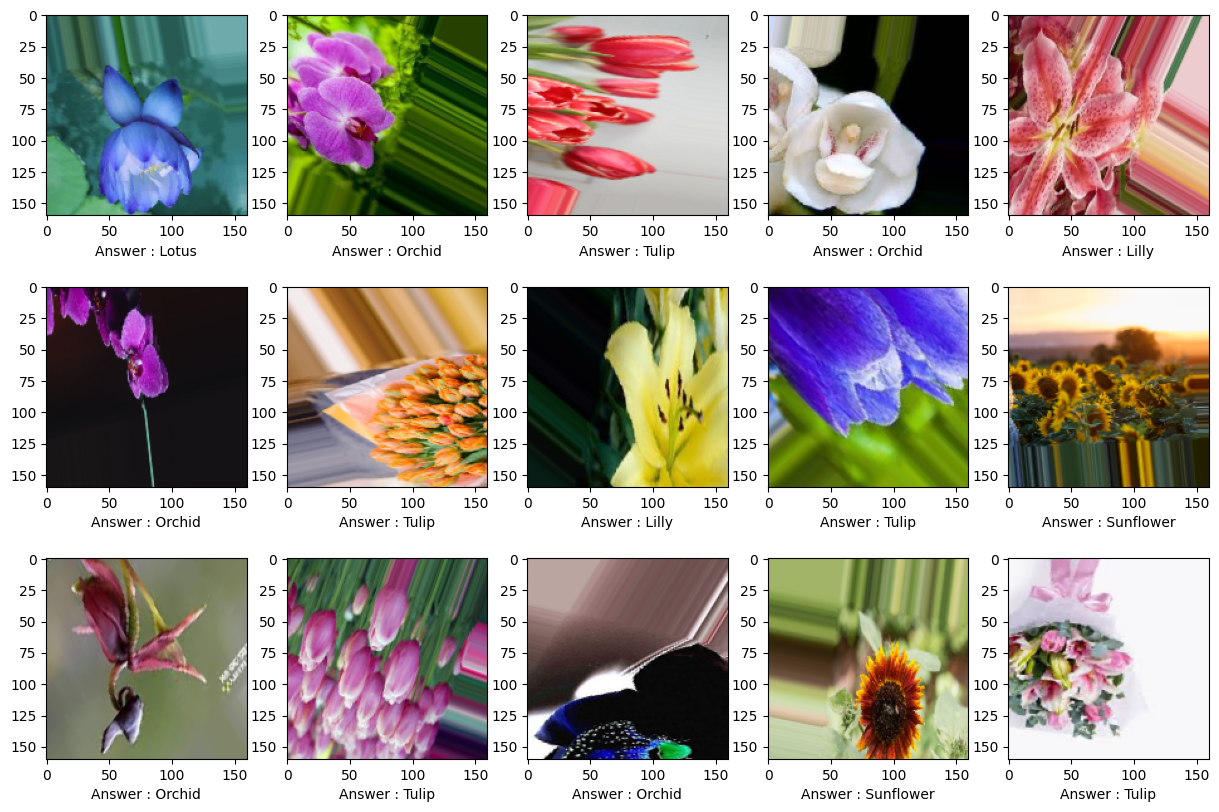

In [13]:
# train 이미지 확인
labels_dict = {0:'Lilly', 1:'Lotus', 2:'Orchid', 3:'Sunflower', 4:'Tulip'}

batch = next(train_gen)

print(batch)
print()

images, labels = batch

print(len(images))
print()
print(len(labels))
print()
print(labels)  # ImageDataGenerator로 전처리 하면 자동으로 원-핫 인코딩으로 준비 됨.
# 따라서 신경망 모델 컴파일 시 loss = 'categorical_crossentropy'로 해야 함.


# train data idx 번째 이미지를 시각화
plt.figure(figsize=(15,10))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(images[i])
    plt.xlabel(f"Answer : {labels_dict[np.argmax(labels[i])]}")
    #plt.title(f"Label: {labels[0]}")
plt.show()


In [14]:
# 신경망 모델 구성
model = keras.Sequential()

model.add(keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding='same', input_shape=(160, 160, 3)))
model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(80, 80, 256)

#model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
#model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(40, 40, 128)

#model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
#model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(20, 20, 128)

#model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
#model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(10, 10, 128)

#model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
#model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(5, 5, 128)

model.add(keras.layers.Flatten())   # 밀집층에 입력시키기 위해 3차원을 1차원으로 변환.

model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dropout(0.2))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.

#model.add(keras.layers.Dense(50, activation='relu'))
#model.add(keras.layers.Dropout(0.2))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.

#model.add(keras.layers.Dense(50, activation='relu'))
#model.add(keras.layers.Dropout(0.2))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.
 
model.add(keras.layers.Dense(5, activation='softmax'))

# 신경망 모델 구조
model.summary()
 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 160, 160, 256)     7168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 80, 80, 256)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1638400)           0         
                                                                 
 dense_2 (Dense)             (None, 50)                81920050  
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 5)                 255       
                                                      

In [15]:
# 신경망 모델 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('T3_N04_size160_conv1-256_den1-50_epo15_val15.h5', save_best_only=True)

#early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [16]:
# 신경망 모델 훈련
history = model.fit(train_gen, epochs=15, validation_data=val_gen, verbose=1, callbacks=[checkpoint_cb])


Epoch 1/15
120/120 [==============================] - ETA: 0s - loss: 3.0008 - accuracy: 0.2400

C:\Users\T\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


120/120 [==============================] - 701s 6s/step - loss: 3.0008 - accuracy: 0.2400 - val_loss: 1.4832 - val_accuracy: 0.3867
Epoch 2/15
120/120 [==============================] - 873s 7s/step - loss: 1.4974 - accuracy: 0.3660 - val_loss: 1.3775 - val_accuracy: 0.4607
Epoch 3/15
120/120 [==============================] - 964s 8s/step - loss: 1.4481 - accuracy: 0.3987 - val_loss: 1.2521 - val_accuracy: 0.5541
Epoch 4/15
120/120 [==============================] - 916s 8s/step - loss: 1.3794 - accuracy: 0.4233 - val_loss: 1.2382 - val_accuracy: 0.5467
Epoch 5/15
120/120 [==============================] - 974s 8s/step - loss: 1.3530 - accuracy: 0.4523 - val_loss: 1.2427 - val_accuracy: 0.5452
Epoch 6/15
120/120 [==============================] - 1008s 8s/step - loss: 1.3122 - accuracy: 0.4690 - val_loss: 1.1892 - val_accuracy: 0.5407
Epoch 7/15
120/120 [==============================] - 1006s 8s/step - loss: 1.3050 - accuracy: 0.4677 - val_loss: 1.1670 - val_accuracy: 0.5496
Epoch 8/

In [17]:
# history의 key값 알아보기
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


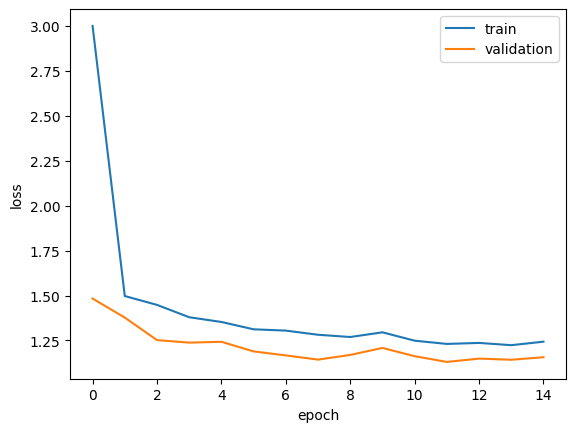

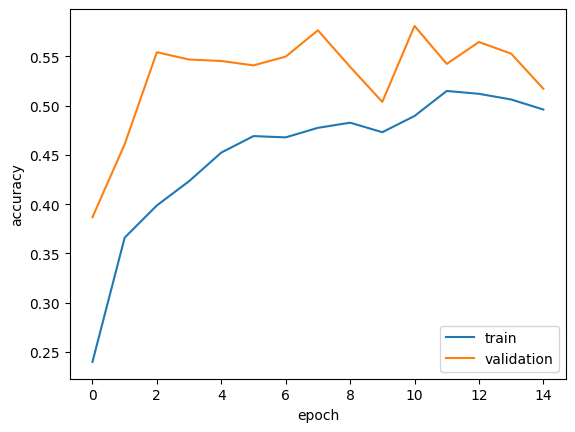

In [18]:
# 훈련 과정 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
plt.show()

In [19]:
# test 평가
model.evaluate(test_gen)

16/16 [==============================] - 9s 545ms/step - loss: 1.1383 - accuracy: 0.5400


[1.1383382081985474, 0.5400000214576721]

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
[0. 0. 0. 0. 1.]
32
1/1 [==============================] - 1s 717ms/step
[[1.48893118e-01 2.80610800e-01 2.99725980e-01 6.54615536e-02
  2.05308467e-01]
 [2.21077010e-01 1.24347396e-01 1.43965691e-01 3.15639853e-01
  1.94970071e-01]
 [1.91926748e-01 5.25074005e-02 8.69703144e-02 5.60098052e-01
  1.08497463e-01]
 [4.31787640e-01 1.95788383e-01 2.17306450e-01 5.65498834e-03
  1.49462551e-01]
 [2.45975539e-01 2.06118524e-0

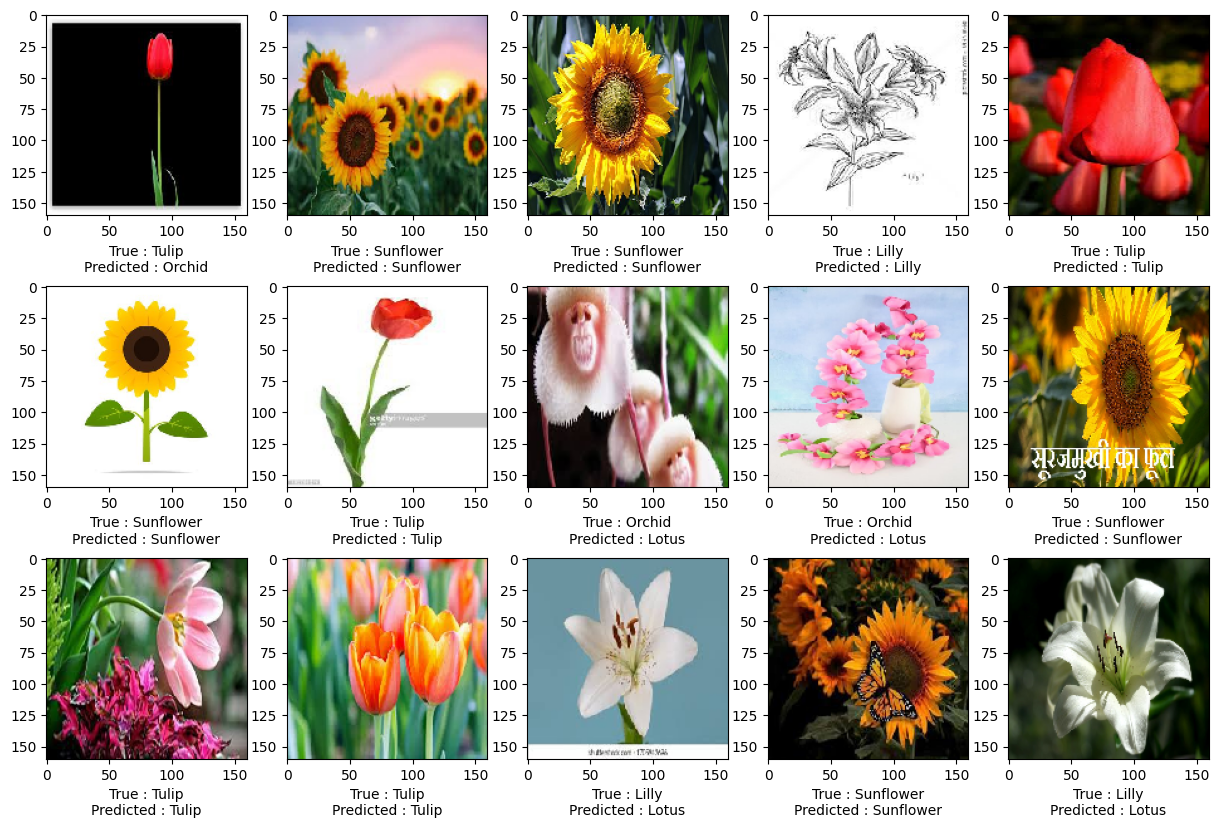

In [23]:
# test 평가 시각화
test_images, test_labels = next(test_gen)  

print(test_labels)
print(test_labels[0])
print(len(test_labels))

pred = model.predict(test_images)

print(pred)
print(pred[0])
print(len(pred))

plt.figure(figsize=(15, 10))
for i in range(15):  
    plt.subplot(3, 5, i+1)
    plt.imshow(test_images[i])
    true_label = labels_dict[np.argmax(test_labels[i])]  
    predicted_label = labels_dict[np.argmax(pred[i])]  
    plt.xlabel(f'True : {true_label}\nPredicted : {predicted_label}')

plt.show()